In [47]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools

%matplotlib inline

loc = "Dataset\\"

raw_data_1 = pd.read_csv(loc + '2016-2017.csv')
raw_data_2 = pd.read_csv(loc + '2017-2018.csv')
raw_data_3 = pd.read_csv(loc + '2018-2019.csv')
raw_data_4 = pd.read_csv(loc + '2019-2020.csv')
raw_data_5 = pd.read_csv(loc + '2020-2021.csv')
raw_data_6 = pd.read_csv(loc + '2021-2022.csv')
raw_data_7 = pd.read_csv(loc + '2022-2023.csv')

In [48]:
#Gets all the statistics related to gameplay
                      
columns_req = ['HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]

In [49]:
playing_stat = pd.concat([raw_data_1,raw_data_2,raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7],ignore_index=True)

In [50]:
playing_stat.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
2655,E0,28/05/2023,Everton,Bournemouth,1,0,H,0,0,D,...,2.14,-1.00,2.02,1.77,2.10,1.81,2.17,1.92,2.03,1.83
2656,E0,28/05/2023,Leeds,Tottenham,1,4,A,0,1,A,...,2.50,0.25,1.84,2.06,1.83,2.10,1.90,2.14,1.81,2.06
2657,E0,28/05/2023,Leicester,West Ham,2,1,H,1,0,H,...,2.51,-0.25,1.75,2.05,1.85,2.06,1.90,2.16,1.82,2.04
2658,E0,28/05/2023,Man United,Fulham,2,1,H,1,1,D,...,2.95,-1.25,1.98,1.92,1.98,1.93,2.07,1.98,1.97,1.89
2659,E0,28/05/2023,Southampton,Liverpool,4,4,D,2,2,D,...,3.22,1.25,1.82,2.08,1.85,2.07,1.96,2.12,1.88,1.98


FTHG - Full Time Home Goal
FTAG - Half Time Away Goal
FTR - Full Time Result
HTHG - Half Time Home Goal
HTAG - Half Time Away Goal
HTR - Half Time Result
HS - Home Shots
AS - Away Shots
HST - Home Shots on Target
AST - Away Shots on Target
HF - Home Team Foul
AF - Away Team Foul
HC - Home Team Corner
AC - Away Team Corner
HY - Home Team Yellow Card
Ay - Away Team Yellow Card
HR - Home Team Red Card
Ar - Away Team Red Card

In [51]:
# Creating csv file from the merged dataframe

playing_stat.to_csv(loc + "Merged_dataset.csv")

In [52]:
df = pd.read_csv("Dataset\\merged_dataset.csv")

In [53]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / df.shape[0]
avg_away_scored = df.FTAG.sum() / df.shape[0]
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)

1.530451127819549


In [85]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')
res_home.groups.keys()

dict_keys(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Hull', 'Leeds', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', "Nott'm Forest", 'Sheffield United', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves'])

We calculate attacking strength of each team at home and away from goals scored at home and away. We will use this as a feature in our prediction model.

In [93]:
# Tạo DataFrame table với các cột cần thiết
table = pd.DataFrame(columns=['Team', 'HGS', 'HGC', 'AGS', 'AGC', 'HAS', 'AAS', 'HDS', 'ADS'])

# Gán dữ liệu cho các cột
table['Team'] = list(res_home.groups.keys())
table['HGS'] = res_home.FTHG.sum().values
table['HGC'] = res_home.FTAG.sum().values
table['AGS'] = res_away.FTAG.sum().values
table['AGC'] = res_away.FTHG.sum().values

table['HAS'] = (table['HGS'] / 160.0) / avg_home_scored
table['AAS'] = (table['AGS'] / 160.0) / avg_away_scored
table['HDS'] = (table['HGC'] / 160.0) / avg_home_conceded
table['ADS'] = (table['AGC'] / 160.0) / avg_away_conceded

# In ra DataFrame table
print(table)


                Team  HGS  HGC  AGS  AGC       HAS       AAS       HDS  \
0            Arsenal  283  139  201  185  1.155705  1.013843  0.701115   
1        Aston Villa  113  107   86  106  0.461465  0.433783  0.539707   
2        Bournemouth  133  142  100  192  0.543141  0.504399  0.716247   
3          Brentford   57   39   49   63  0.232775  0.247156  0.196716   
4           Brighton  141  146  121  165  0.575811  0.610323  0.736423   
5            Burnley  122  144  108  176  0.498219  0.544751  0.726335   
6            Cardiff   21   38   13   31  0.085759  0.065572  0.191672   
7            Chelsea  242  120  209  160  0.988271  1.054194  0.605279   
8     Crystal Palace  155  167  153  215  0.632983  0.771731  0.842347   
9            Everton  191  160  137  215  0.779999  0.691027  0.807039   
10            Fulham   62   93   54   94  0.253193  0.272376  0.469091   
11      Huddersfield   26   56   24   78  0.106178  0.121056  0.282464   
12              Hull   28   35    9   

HGS - Home Goals Scored

HGC - Home Goals Conceded

AGS - Away Goals Scored

AGS - Away Goals Conceded

HAS - Home Attacking Strength

HDS - Home Defensive Strength

AAS - Away Attacking Strength

ADS - Away Defensive Strength

In [94]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:23]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS
0,Burnley,Swansea,A,3,9,7,4,0.498219,0.726335,0.146276,0.277696
1,Crystal Palace,West Brom,A,4,3,3,6,0.632983,0.842347,0.232024,0.379790
2,Everton,Tottenham,D,6,4,5,6,0.779999,0.807039,1.150030,0.710575
3,Hull,Leicester,H,5,5,5,3,0.114345,0.176540,0.993667,0.918847
4,Man City,Sunderland,H,4,3,9,6,1.523244,0.529619,0.065572,0.142932
...,...,...,...,...,...,...,...,...,...,...,...
2655,Everton,Bournemouth,H,6,2,9,3,0.779999,0.807039,0.504399,0.784083
2656,Leeds,Tottenham,A,2,7,12,3,0.298115,0.484223,1.150030,0.710575
2657,Leicester,West Ham,H,4,3,3,5,0.841255,0.827215,0.827215,0.869842
2658,Man United,Fulham,H,8,3,5,4,0.992354,0.620411,0.272376,0.383874


Converting the features to csv file

In [95]:
feature_table.to_csv(loc + "Feature_table.csv")

In [96]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [97]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.tail()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
2655,Everton,Bournemouth,H,6,2,9,3,0.779999,0.807039,0.504399,0.784083,1
2656,Leeds,Tottenham,A,2,7,12,3,0.298115,0.484223,1.150030,0.710575,-1
2657,Leicester,West Ham,H,4,3,3,5,0.841255,0.827215,0.827215,0.869842,1
2658,Man United,Fulham,H,8,3,5,4,0.992354,0.620411,0.272376,0.383874,1
2659,Southampton,Liverpool,D,10,8,2,9,0.632983,0.998711,1.271086,0.612564,0


Creating two sets of training sets one with only has attacking and defensive strength and other set has attacking and defensive strength but also shots and corners

In [98]:
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','HST','AST','HC','AC']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HAS,HDS,AAS,ADS
2655,0.779999,0.807039,0.504399,0.784083
2656,0.298115,0.484223,1.150030,0.710575
2657,0.841255,0.827215,0.827215,0.869842
2658,0.992354,0.620411,0.272376,0.383874
2659,0.632983,0.998711,1.271086,0.612564


,HAS,HDS,AAS,ADS,HST,AST,HC,AC
2655,0.779999,0.807039,0.504399,0.784083,6,2,9,3
2656,0.298115,0.484223,1.150030,0.710575,2,7,12,3
2657,0.841255,0.827215,0.827215,0.869842,4,3,3,5
2658,0.992354,0.620411,0.272376,0.383874,8,3,5,4
2659,0.632983,0.998711,1.271086,0.612564,10,8,2,9


Multinomial Naive Bayes

In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [101]:
nbb_scores = []
nbb_scores_2 = []

for i in range(0,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0   0.46466165413533833  :  0.5845864661654137
NB alpha  50   0.4616541353383458  :  0.5864661654135339
NB alpha  100   0.45714285714285713  :  0.5898496240601505
NB alpha  150   0.45488721804511273  :  0.5894736842105264
NB alpha  200   0.4526315789473684  :  0.5894736842105263
NB alpha  250   0.4526315789473684  :  0.5902255639097744
NB alpha  300   0.4526315789473684  :  0.5906015037593985
NB alpha  350   0.4526315789473684  :  0.5913533834586465
NB alpha  400   0.4526315789473684  :  0.5913533834586466
NB alpha  450   0.4526315789473684  :  0.5906015037593985
NB alpha  500   0.4526315789473684  :  0.5883458646616542
NB alpha  550   0.4526315789473684  :  0.5894736842105264
NB alpha  600   0.4526315789473684  :  0.5890977443609022
NB alpha  650   0.4526315789473684  :  0.5898496240601504
NB alpha  700   0.4526315789473684  :  0.5890977443609022
NB alpha  750   0.4526315789473684  :  0.587593984962406
NB alpha  800   0.4526315789473684  :  0.5868421052631579
NB alpha  850  

In [103]:
clf = [MultinomialNB(), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.46466165413533833  :  0.5845864661654137
SVM  :  0.5477443609022556  :  0.630827067669173


C:\Users\hoang\PycharmProjects\MachineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hoang\PycharmProjects\MachineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Log regres  :  0.5530075187969924  :  0.6334586466165413


C:\Users\hoang\PycharmProjects\MachineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


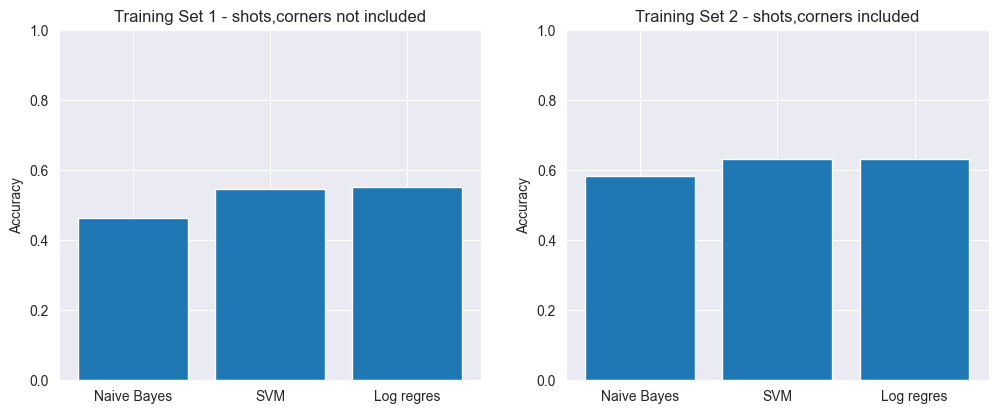

In [107]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center')
ax.set_xticks(range(3))
ax.set_xticks(range(3))
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels)

ax2 = fig.add_subplot(2,2,2)
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(3))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1)
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);